<a href="https://colab.research.google.com/github/melindasiburian/dynamic_pricing/blob/main/Copy_of_dataset_making_dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Jumlah wisatawan mancanegara

In [1]:
import pandas as pd
df = pd.read_csv("/content/raw_data - Banyaknya Wisatawan Mancanegara .csv")
df.head()

year  month  total_visitors
0  2009      1          174541
1  2009      2          147704
2  2009      3          168205
3  2009      4          188776
4  2009      5          190803

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            200 non-null    int64
 1   month           200 non-null    int64
 2   total_visitors  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [3]:
# Combine 'year' and 'month' columns into a single 'date' column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

# Display the DataFrame with the new 'date' column and its info
print("DataFrame with new 'date' column:")
display(df.head())
print("\nInfo of the DataFrame with 'date' column:")
df.info()

DataFrame with new 'date' column:


year  month  total_visitors       date
0  2009      1          174541 2009-01-01
1  2009      2          147704 2009-02-01
2  2009      3          168205 2009-03-01
3  2009      4          188776 2009-04-01
4  2009      5          190803 2009-05-01


Info of the DataFrame with 'date' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            200 non-null    int64         
 1   month           200 non-null    int64         
 2   total_visitors  200 non-null    int64         
 3   date            200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.4 KB


In [4]:
# Determine high and low season for each year based on the annual median visitor counts

# Calculate the median visitor count for each year
annual_median = df.groupby('year')['total_visitors'].transform('median')

# Create the 'season' column based on the annual median
df['season_annual_median'] = df.apply(lambda row: 'High Season' if row['total_visitors'] > annual_median[row.name] else 'Low Season', axis=1)

# Display the DataFrame with the new 'season_annual_median' column
print("DataFrame with 'season_annual_median' column (based on annual median):")
display(df.head(100))
print("\nValue counts for the 'season_annual_median' column:")
print(df['season_annual_median'].value_counts())

# Optional: Display value counts per year to verify
# print("\nValue counts for 'season_annual_median' per year:")
# print(df.groupby('year')['season_annual_median'].value_counts())

DataFrame with 'season_annual_median' column (based on annual median):


year  month  total_visitors       date season_annual_median
0   2009      1          174541 2009-01-01           Low Season
1   2009      2          147704 2009-02-01           Low Season
2   2009      3          168205 2009-03-01           Low Season
3   2009      4          188776 2009-04-01           Low Season
4   2009      5          190803 2009-05-01           Low Season
..   ...    ...             ...        ...                  ...
95  2016     12          442800 2016-12-01          High Season
96  2017      1          460824 2017-01-01           Low Season
97  2017      2          453985 2017-02-01           Low Season
98  2017      3          425499 2017-03-01           Low Season
99  2017      4          477464 2017-04-01          High Season

[100 rows x 5 columns]


Value counts for the 'season_annual_median' column:
season_annual_median
Low Season     100
High Season    100
Name: count, dtype: int64


## Acquire events and holiday data

### Subtask:
Find or create a dataset of major events, holidays, and school breaks relevant to Bali tourism and the primary visitor countries.


**Reasoning**:
I need to compile a dataset of major events, holidays, and school breaks relevant to Bali tourism. Since I cannot access external websites or APIs to gather this information in real-time, I will create a dummy dataset based on general knowledge of Indonesian holidays, school breaks, and common events in Bali during 2022-2023. This dataset will include event names, start dates, and end dates where applicable.



In [5]:
import pandas as pd

# Create a dummy dataset for major events, holidays, and school breaks in Bali (2009-2025)
# This is a simplified dummy dataset. A real dataset would require external data sources.
data = {
    'event_name': [
        'Nyepi', 'Eid al-Fitr Holiday', 'Bali Arts Festival', 'Independence Day',
        'Galungan and Kuningan', 'Christmas Holiday', 'New Year Holiday',
        'School Holiday (Mid-year)', 'School Holiday (End-year)',
        'G20 Summit Bali' # Specific to 2022, keep for that year
    ],
    'start_date_template': [
        '-03-03', '-05-02', '-06-12', '-08-17',
        '-06-08', '-12-25', '-01-01',
        '-06-20', '-12-19',
        '2022-11-15' # G20 Summit
    ],
     'end_date_template': [
        '-03-04', '-05-03', '-07-10', '-08-17',
        '-06-18', '-12-26', '-01-01',
        '-07-01', '-12-30',
        '2022-11-16' # G20 Summit
    ]
}

event_templates_df = pd.DataFrame(data)

# Generate events for the years 2009 to 2025
all_events_data = []
for year in range(2009, 2026):
    for index, row in event_templates_df.iterrows():
        event_name = row['event_name']
        start_template = row['start_date_template']
        end_template = row['end_date_template']

        # Handle G20 Summit as a specific event in 2022
        if event_name == 'G20 Summit Bali':
            if year == 2022:
                 all_events_data.append({
                    'event_name': event_name,
                    'start_date': pd.to_datetime(start_template),
                    'end_date': pd.to_datetime(end_template)
                })
            continue # Skip for other years


        try:
            start_date = pd.to_datetime(str(year) + start_template)
            end_date = pd.to_datetime(str(year) + end_template)
            # Adjust end date for events that cross year boundaries (like New Year)
            if end_date < start_date:
                 end_date = pd.to_datetime(str(year + 1) + end_template)

            all_events_data.append({
                'event_name': event_name,
                'start_date': start_date,
                'end_date': end_date
            })
        except Exception as e:
            print(f"Could not create date for year {year} and event {event_name}: {e}")


events_df = pd.DataFrame(all_events_data)


# Convert date columns to datetime objects (already done during creation but double check)
events_df['start_date'] = pd.to_datetime(events_df['start_date'])
events_df['end_date'] = pd.to_datetime(events_df['end_date'])


print("Dummy Events, Holidays, and School Breaks Data (2009-2025):")
display(events_df.head())
print("\nChecking data types:")
print(events_df.info())

Dummy Events, Holidays, and School Breaks Data (2009-2025):


event_name start_date   end_date
0                  Nyepi 2009-03-03 2009-03-04
1    Eid al-Fitr Holiday 2009-05-02 2009-05-03
2     Bali Arts Festival 2009-06-12 2009-07-10
3       Independence Day 2009-08-17 2009-08-17
4  Galungan and Kuningan 2009-06-08 2009-06-18


Checking data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_name  154 non-null    object        
 1   start_date  154 non-null    datetime64[ns]
 2   end_date    154 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 3.7+ KB
None


In [6]:
# Aggregate event data to count the number of event days within each month (2009-2025)
# First, create a date range for each event
event_dates = []
for index, row in events_df.iterrows():
    start_date = row['start_date']
    end_date = row['end_date']
    # Include both start and end dates in the range
    dates_in_event = pd.date_range(start=start_date, end=end_date, freq='D')
    event_dates.extend(dates_in_event)

# Create a DataFrame of all unique event days
event_days_df = pd.DataFrame({'date': event_dates}).drop_duplicates()

# Extract month and year to group by
event_days_df['month_year'] = event_days_df['date'].dt.to_period('M')

# Count the number of event days per month
monthly_event_counts = event_days_df.groupby('month_year').size().reset_index(name='monthly_event_days')

# Display the result
print("Monthly Event Days (2009-2025):")
display(monthly_event_counts.head())
print("\nInfo for Monthly Event Days:")
monthly_event_counts.info()

Monthly Event Days (2009-2025):


month_year  monthly_event_days
0    2009-01                   1
1    2009-03                   2
2    2009-05                   2
3    2009-06                  23
4    2009-07                  10


Info for Monthly Event Days:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   month_year          120 non-null    period[M]
 1   monthly_event_days  120 non-null    int64    
dtypes: int64(1), period[M](1)
memory usage: 2.0 KB


In [7]:
# Ensure df is not indexed by 'date' before processing if needed, or handle resampling on index
if 'date' in df.index.names:
    df = df.reset_index()

# Ensure the 'date' column in df is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month and year for merging
df['month_year'] = df['date'].dt.to_period('M')

# Ensure monthly_event_counts 'month_year' is also period[M]
# monthly_event_counts['month_year'] = monthly_event_counts['month_year'].dt.to_period('M') # This line caused the error, monthly_event_counts['month_year'] is already period[M]


# Merge the two dataframes on the 'month_year' column
merged_visitor_event_df = pd.merge(df, monthly_event_counts, on='month_year', how='left')

# Fill NaN values in 'monthly_event_days' with 0, assuming months with no recorded events had 0 event days
merged_visitor_event_df['monthly_event_days'] = merged_visitor_event_df['monthly_event_days'].fillna(0)


# Display the head and info of the merged dataframe
print("Merged DataFrame (Visitor Data + Monthly Event Days):")
display(merged_visitor_event_df.head())
print("\nInfo for Merged DataFrame:")
merged_visitor_event_df.info()

Merged DataFrame (Visitor Data + Monthly Event Days):


year  month  total_visitors       date season_annual_median month_year  \
0  2009      1          174541 2009-01-01           Low Season    2009-01   
1  2009      2          147704 2009-02-01           Low Season    2009-02   
2  2009      3          168205 2009-03-01           Low Season    2009-03   
3  2009      4          188776 2009-04-01           Low Season    2009-04   
4  2009      5          190803 2009-05-01           Low Season    2009-05   

   monthly_event_days  
0                 1.0  
1                 0.0  
2                 2.0  
3                 0.0  
4                 2.0


Info for Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  200 non-null    int64         
 1   month                 200 non-null    int64         
 2   total_visitors        200 non-null    int64         
 3   date                  200 non-null    datetime64[ns]
 4   season_annual_median  200 non-null    object        
 5   month_year            200 non-null    period[M]     
 6   monthly_event_days    200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1), period[M](1)
memory usage: 11.1+ KB


In [8]:
#Drop the specified columns
columns_to_drop = ['year', 'month', 'month_year']
merged_visitor_event_df = merged_visitor_event_df.drop(columns=columns_to_drop)

#Display the head and info of the updated DataFrame to confirm the columns are removed
print("DataFrame after dropping 'year', 'month', and 'month_year' columns:")
display(merged_visitor_event_df.head())
print("\nInfo for the updated DataFrame:")
merged_visitor_event_df.info()

DataFrame after dropping 'year', 'month', and 'month_year' columns:


total_visitors       date season_annual_median  monthly_event_days
0          174541 2009-01-01           Low Season                 1.0
1          147704 2009-02-01           Low Season                 0.0
2          168205 2009-03-01           Low Season                 2.0
3          188776 2009-04-01           Low Season                 0.0
4          190803 2009-05-01           Low Season                 2.0


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_visitors        200 non-null    int64         
 1   date                  200 non-null    datetime64[ns]
 2   season_annual_median  200 non-null    object        
 3   monthly_event_days    200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


## Acquire weather data

### Subtask:
Obtain historical weather data for Bali (e.g., average temperature, precipitation) on a daily or weekly basis from a weather data provider (e.g., OpenWeatherMap API, Visual Crossing Weather API - check their terms and pricing).


**Reasoning**:
Simulate the daily weather data for Bali for the specified period and display the head and info of the created DataFrame.



In [9]:
import pandas as pd
df_weather = pd.read_csv("/content/Weather - 2009-2025.csv")
df_weather.head(50)

DATE  TEMP   PRCP
0   2009-01-01  82.6   0.00
1   2009-01-02  82.6   0.00
2   2009-01-03  82.5   0.12
3   2009-01-04  81.3   0.67
4   2009-01-05  81.5   0.02
5   2009-01-06  81.5   0.91
6   2009-01-07  81.4   0.00
7   2009-01-08  79.2   0.83
8   2009-01-09  82.6   0.00
9   2009-01-10  79.1   0.87
10  2009-01-11  79.5   2.64
11  2009-01-12  78.9   0.12
12  2009-01-13  81.0   0.35
13  2009-01-14  82.1   0.00
14  2009-01-15  80.8   1.02
15  2009-01-16  78.9   0.32
16  2009-01-17  82.2   0.00
17  2009-01-18  83.1   0.00
18  2009-01-19  83.3   0.00
19  2009-01-20  83.5   0.00
20  2009-01-21  81.4   0.08
21  2009-01-22  82.1   0.00
22  2009-01-23  82.6   0.00
23  2009-01-24  80.5   0.00
24  2009-01-25  83.5   0.00
25  2009-01-26  83.8  99.99
26  2009-01-27  83.2   2.09
27  2009-01-28  82.6  99.99
28  2009-01-29  80.7   0.12
29  2009-01-30  79.8   0.37
30  2009-01-31  78.3   0.51
31  2009-02-01  80.7   1.73
32  2009-02-02  80.2   0.20
33  2009-02-03  79.3   1.56
34  2009-02-04  80.4   0.16
35  2009-02-05  83.0   0.02
36  2009-02-06  83.6   0.00
37  2009-02-07  82.4   0.00
38  2009-02-08  84.4   0.00
39  2009-02-09  82.3   0.00
40  2009-02-10  80.0   0.28
41  2009-02-11  79.7   0.79
42  2009-02-12  80.1   0.37
43  2009-02-13  81.9   0.12
44  2009-02-14  82.7   0.02
45  2009-02-15  80.0   1.95
46  2009-02-16  79.9   0.00
47  2009-02-17  80.5   1.54
48  2009-02-18  81.1   0.00
49  2009-02-19  81.0   0.03

In [10]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6035 entries, 0 to 6034
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    6035 non-null   object 
 1   TEMP    6035 non-null   float64
 2   PRCP    6035 non-null   float64
dtypes: float64(2), object(1)
memory usage: 141.6+ KB


In [11]:
import numpy as np

# Replace 99.99 with NaN in the 'PRCP' column
df_weather['PRCP'] = df_weather['PRCP'].replace(99.99, np.nan)

# Display the head of the DataFrame to see the changes
df_weather.head()

DATE  TEMP  PRCP
0  2009-01-01  82.6  0.00
1  2009-01-02  82.6  0.00
2  2009-01-03  82.5  0.12
3  2009-01-04  81.3  0.67
4  2009-01-05  81.5  0.02

In [12]:
# Ensure 'DATE' column is in datetime format
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# Convert temperature from Fahrenheit to Celsius
df_weather['TEMP_celsius'] = (df_weather['TEMP'] - 32) * 5/9

# Calculate daily metrics
df_weather['days_observed'] = 1 # Each row is one observed day
# Assume NaN PRCP as 0 for counting rain_days
df_weather['rain_days'] = (df_weather['PRCP'].fillna(0) > 0).astype(int)

# Set 'DATE' as the index for resampling
df_weather = df_weather.set_index('DATE')

# Resample the data to monthly frequency, calculating the required metrics
monthly_weather_df = df_weather.resample('M').agg({
    'TEMP_celsius': 'mean', # Mean temperature
    'PRCP': 'sum', # Total precipitation (NaNs are ignored by sum by default)
    'days_observed': 'sum', # Total observed days in the month
    'rain_days': 'sum' # Total rain days in the month
}).reset_index()

# Rename the date column for clarity and the temperature column
monthly_weather_df = monthly_weather_df.rename(columns={'DATE': 'month_year', 'TEMP_celsius': 'average_temperature_celsius'})

# Calculate days_in_month and rain_days_percent
monthly_weather_df['days_in_month'] = monthly_weather_df['month_year'].dt.daysinmonth
monthly_weather_df['rain_days_percent'] = (monthly_weather_df['rain_days'] / monthly_weather_df['days_observed']) * 100

# Display the head and info of the resulting monthly weather DataFrame
print("Monthly Weather Data with additional metrics:")
display(monthly_weather_df.head())
print("\nInfo for Monthly Weather Data:")
monthly_weather_df.info()

Monthly Weather Data with additional metrics:


/tmp/ipython-input-3330325616.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_weather_df = df_weather.resample('M').agg({


month_year  average_temperature_celsius   PRCP  days_observed  rain_days  \
0 2009-01-31                    27.492832  11.04             31         16   
1 2009-02-28                    27.384921   9.26             28         16   
2 2009-03-31                    27.693548   5.71             31         10   
3 2009-04-30                    28.220370   0.50             30          4   
4 2009-05-31                    27.683333   2.58             30          7   

   days_in_month  rain_days_percent  
0             31          51.612903  
1             28          57.142857  
2             31          32.258065  
3             30          13.333333  
4             31          23.333333


Info for Monthly Weather Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   month_year                   200 non-null    datetime64[ns]
 1   average_temperature_celsius  200 non-null    float64       
 2   PRCP                         200 non-null    float64       
 3   days_observed                200 non-null    int64         
 4   rain_days                    200 non-null    int64         
 5   days_in_month                200 non-null    int32         
 6   rain_days_percent            200 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2)
memory usage: 10.3 KB


In [13]:
# Convert precipitation from inches to millimeters (1 inch = 25.4 mm)
monthly_weather_df['PRCP_mm'] = monthly_weather_df['PRCP'] * 25.4

# Drop the original 'PRCP' column
monthly_weather_df = monthly_weather_df.drop(columns=['PRCP'])

# Display the head of the DataFrame with the new column
print("Monthly Weather Data with Precipitation in mm (Original PRCP column removed):")
display(monthly_weather_df.head())

# Display info to confirm the new column and its dtype
print("\nInfo for Monthly Weather Data after adding PRCP_mm and removing PRCP:")
monthly_weather_df.info()

Monthly Weather Data with Precipitation in mm (Original PRCP column removed):


month_year  average_temperature_celsius  days_observed  rain_days  \
0 2009-01-31                    27.492832             31         16   
1 2009-02-28                    27.384921             28         16   
2 2009-03-31                    27.693548             31         10   
3 2009-04-30                    28.220370             30          4   
4 2009-05-31                    27.683333             30          7   

   days_in_month  rain_days_percent  PRCP_mm  
0             31          51.612903  280.416  
1             28          57.142857  235.204  
2             31          32.258065  145.034  
3             30          13.333333   12.700  
4             31          23.333333   65.532


Info for Monthly Weather Data after adding PRCP_mm and removing PRCP:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   month_year                   200 non-null    datetime64[ns]
 1   average_temperature_celsius  200 non-null    float64       
 2   days_observed                200 non-null    int64         
 3   rain_days                    200 non-null    int64         
 4   days_in_month                200 non-null    int32         
 5   rain_days_percent            200 non-null    float64       
 6   PRCP_mm                      200 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2)
memory usage: 10.3 KB


In [14]:
import pandas as pd

# Ensure merged_visitor_event_df is available and has the 'date' column
if 'merged_visitor_event_df' not in locals() or merged_visitor_event_df is None or merged_visitor_event_df.empty:
    print("Error: merged_visitor_event_df DataFrame is not available or is empty. Cannot proceed with merge.")
    raise NameError("merged_visitor_event_df is not available")

# Ensure monthly_weather_df is available
if 'monthly_weather_df' not in locals() or monthly_weather_df is None or monthly_weather_df.empty:
    print("Error: monthly_weather_df DataFrame is not available or is empty. Cannot proceed with merge.")
    raise NameError("monthly_weather_df is not available")

# Check if 'month_year' column exists in monthly_weather_df before processing
if 'month_year' not in monthly_weather_df.columns:
     print("Error: 'month_year' column not found in monthly_weather_df. Columns available:", monthly_weather_df.columns.tolist())
     # If 'date' column exists instead, assume it's the monthly date column
     if 'date' in monthly_weather_df.columns:
         print("Using existing 'date' column in monthly_weather_df for merging.")
         # Ensure it's datetime and represents the first day of the month if possible
         monthly_weather_df['date'] = pd.to_datetime(monthly_weather_df['date'])
         monthly_weather_df['date'] = monthly_weather_df['date'].dt.to_period('M').dt.to_timestamp()
     else:
         raise KeyError('month_year or date column not found in monthly_weather_df')
else:
    # Process monthly_weather_df: rename 'month_year' to 'date' and set to the first day of the month
    # Ensure 'month_year' is datetime first (based on hKfCNTeaGFhQ output, it should be)
    # Convert to first day of the month and rename to 'date'
    monthly_weather_df['date'] = monthly_weather_df['month_year'].dt.to_period('M').dt.to_timestamp()
    # Drop the original 'month_year' column
    monthly_weather_df = monthly_weather_df.drop(columns=['month_year'])

print("Proceeding with merge...")

# Ensure the 'date' column in both dataframes is in datetime format (redundant but safe check)
merged_visitor_event_df['date'] = pd.to_datetime(merged_visitor_event_df['date'])
monthly_weather_df['date'] = pd.to_datetime(monthly_weather_df['date'])

# Merge the two dataframes on the 'date' column
final_merged_df = pd.merge(merged_visitor_event_df, monthly_weather_df, on='date', how='left')

# Display the head and info of the final merged dataframe
print("Final Merged DataFrame (Visitor, Event, and Weather Data):")
display(final_merged_df.head())
print("\nInfo for Final Merged DataFrame:")
final_merged_df.info()

Proceeding with merge...
Final Merged DataFrame (Visitor, Event, and Weather Data):


total_visitors       date season_annual_median  monthly_event_days  \
0          174541 2009-01-01           Low Season                 1.0   
1          147704 2009-02-01           Low Season                 0.0   
2          168205 2009-03-01           Low Season                 2.0   
3          188776 2009-04-01           Low Season                 0.0   
4          190803 2009-05-01           Low Season                 2.0   

   average_temperature_celsius  days_observed  rain_days  days_in_month  \
0                    27.492832             31         16             31   
1                    27.384921             28         16             28   
2                    27.693548             31         10             31   
3                    28.220370             30          4             30   
4                    27.683333             30          7             31   

   rain_days_percent  PRCP_mm  
0          51.612903  280.416  
1          57.142857  235.204  
2          32.258065  145.034  
3          13.333333   12.700  
4          23.333333   65.532


Info for Final Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               200 non-null    int64         
 1   date                         200 non-null    datetime64[ns]
 2   season_annual_median         200 non-null    object        
 3   monthly_event_days           200 non-null    float64       
 4   average_temperature_celsius  200 non-null    float64       
 5   days_observed                200 non-null    int64         
 6   rain_days                    200 non-null    int64         
 7   days_in_month                200 non-null    int32         
 8   rain_days_percent            200 non-null    float64       
 9   PRCP_mm                      200 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3), object(1)
memory usage

In [15]:
import pandas as pd

# Load the representative prices data with competitive info
prices_df = pd.read_csv("/content/representative_prices_with_competitive_price_and_count.csv")
print("Representative prices data with competitive info loaded successfully.")
display(prices_df.head())
print("\nInfo for prices_df:")
prices_df.info()

# Convert 'date' column to datetime objects in prices_df
prices_df['date'] = pd.to_datetime(prices_df['date'])
print("Date column in prices_df converted to datetime.")

# Ensure final_merged_df is available before merging
if 'final_merged_df' not in locals() or final_merged_df is None or final_merged_df.empty:
    print("Error: final_merged_df DataFrame is not available or is empty. Cannot proceed with merge.")
    raise NameError("final_merged_df is not available")

# Merge the final_merged_df with the prices_df on the 'date' column
final_data_with_prices = pd.merge(final_merged_df, prices_df, on='date', how='left')

# Display the head and info of the final merged dataframe
print("\nFinal Merged DataFrame (Visitor, Event, Weather, and Prices Data):")
display(final_data_with_prices.head())
print("\nInfo for Final Merged DataFrame with Prices:")
final_data_with_prices.info()

Representative prices data with competitive info loaded successfully.


date  month         category  corrected_price  base_price_idr  \
0  2009-01-01      1           Rental     4.129695e+06         4129695   
1  2009-01-01      1       Experience     2.068969e+06         2068969   
2  2009-01-01      1    Entertainment     1.498710e+06         1498710   
3  2009-01-01      1  In room service     3.787989e+05          378799   
4  2009-02-01      2           Rental     6.639286e+05          663929   

     category_norm  competitive_price  competitor_count  
0           rental            4011512                23  
1       experience            1865854                22  
2    entertainment            1306501                13  
3  in_room_service             394060                11  
4           rental             650644                17


Info for prices_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               800 non-null    object 
 1   month              800 non-null    int64  
 2   category           800 non-null    object 
 3   corrected_price    800 non-null    float64
 4   base_price_idr     800 non-null    int64  
 5   category_norm      800 non-null    object 
 6   competitive_price  800 non-null    int64  
 7   competitor_count   800 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 50.1+ KB
Date column in prices_df converted to datetime.

Final Merged DataFrame (Visitor, Event, Weather, and Prices Data):


total_visitors       date season_annual_median  monthly_event_days  \
0          174541 2009-01-01           Low Season                 1.0   
1          174541 2009-01-01           Low Season                 1.0   
2          174541 2009-01-01           Low Season                 1.0   
3          174541 2009-01-01           Low Season                 1.0   
4          147704 2009-02-01           Low Season                 0.0   

   average_temperature_celsius  days_observed  rain_days  days_in_month  \
0                    27.492832             31         16             31   
1                    27.492832             31         16             31   
2                    27.492832             31         16             31   
3                    27.492832             31         16             31   
4                    27.384921             28         16             28   

   rain_days_percent  PRCP_mm  month         category  corrected_price  \
0          51.612903  280.416      1           Rental     4.129695e+06   
1          51.612903  280.416      1       Experience     2.068969e+06   
2          51.612903  280.416      1    Entertainment     1.498710e+06   
3          51.612903  280.416      1  In room service     3.787989e+05   
4          57.142857  235.204      2           Rental     6.639286e+05   

   base_price_idr    category_norm  competitive_price  competitor_count  
0         4129695           rental            4011512                23  
1         2068969       experience            1865854                22  
2         1498710    entertainment            1306501                13  
3          378799  in_room_service             394060                11  
4          663929           rental             650644                17


Info for Final Merged DataFrame with Prices:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    int64         
 1   date                         800 non-null    datetime64[ns]
 2   season_annual_median         800 non-null    object        
 3   monthly_event_days           800 non-null    float64       
 4   average_temperature_celsius  800 non-null    float64       
 5   days_observed                800 non-null    int64         
 6   rain_days                    800 non-null    int64         
 7   days_in_month                800 non-null    int32         
 8   rain_days_percent            800 non-null    float64       
 9   PRCP_mm                      800 non-null    float64       
 10  month                        800 non-null    int64         
 11 

In [16]:
# Ensure final_data_with_prices is available
if 'final_data_with_prices' not in locals() or final_data_with_prices is None or final_data_with_prices.empty:
    print("Error: final_data_with_prices DataFrame is not available or is empty. Cannot proceed with dropping columns.")
    raise NameError("final_data_with_prices is not available")

# Calculate the price_gap column
if 'base_price_idr' in final_data_with_prices.columns and 'competitive_price' in final_data_with_prices.columns:
    final_data_with_prices['price_gap'] = final_data_with_prices['base_price_idr'] - final_data_with_prices['competitive_price']
    print("Created 'price_gap' column.")
else:
    print("Warning: 'base_price_idr' or 'competitive_price' column not found. Cannot create 'price_gap'.")


# Columns to drop
columns_to_drop = ['category', 'corrected_price']

# Check if columns exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in final_data_with_prices.columns]

if not existing_columns_to_drop:
    print(f"Columns {columns_to_drop} not found in the DataFrame. No columns were dropped.")
    print("Available columns:", final_data_with_prices.columns.tolist())
else:
    # Drop the specified columns
    final_data_with_prices = final_data_with_prices.drop(columns=existing_columns_to_drop)
    print(f"Dropped columns: {existing_columns_to_drop}")

    # Display the head and info of the updated DataFrame
    print("\nDataFrame after dropping columns:")
    display(final_data_with_prices.head())
    print("\nInfo for the updated DataFrame:")
    final_data_with_prices.info()

Created 'price_gap' column.
Dropped columns: ['category', 'corrected_price']

DataFrame after dropping columns:


total_visitors       date season_annual_median  monthly_event_days  \
0          174541 2009-01-01           Low Season                 1.0   
1          174541 2009-01-01           Low Season                 1.0   
2          174541 2009-01-01           Low Season                 1.0   
3          174541 2009-01-01           Low Season                 1.0   
4          147704 2009-02-01           Low Season                 0.0   

   average_temperature_celsius  days_observed  rain_days  days_in_month  \
0                    27.492832             31         16             31   
1                    27.492832             31         16             31   
2                    27.492832             31         16             31   
3                    27.492832             31         16             31   
4                    27.384921             28         16             28   

   rain_days_percent  PRCP_mm  month  base_price_idr    category_norm  \
0          51.612903  280.416      1         4129695           rental   
1          51.612903  280.416      1         2068969       experience   
2          51.612903  280.416      1         1498710    entertainment   
3          51.612903  280.416      1          378799  in_room_service   
4          57.142857  235.204      2          663929           rental   

   competitive_price  competitor_count  price_gap  
0            4011512                23     118183  
1            1865854                22     203115  
2            1306501                13     192209  
3             394060                11     -15261  
4             650644                17      13285


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    int64         
 1   date                         800 non-null    datetime64[ns]
 2   season_annual_median         800 non-null    object        
 3   monthly_event_days           800 non-null    float64       
 4   average_temperature_celsius  800 non-null    float64       
 5   days_observed                800 non-null    int64         
 6   rain_days                    800 non-null    int64         
 7   days_in_month                800 non-null    int32         
 8   rain_days_percent            800 non-null    float64       
 9   PRCP_mm                      800 non-null    float64       
 10  month                        800 non-null    int64         
 11  base_price_i

### Handling Outliers

Visualizing outliers using Box Plots:


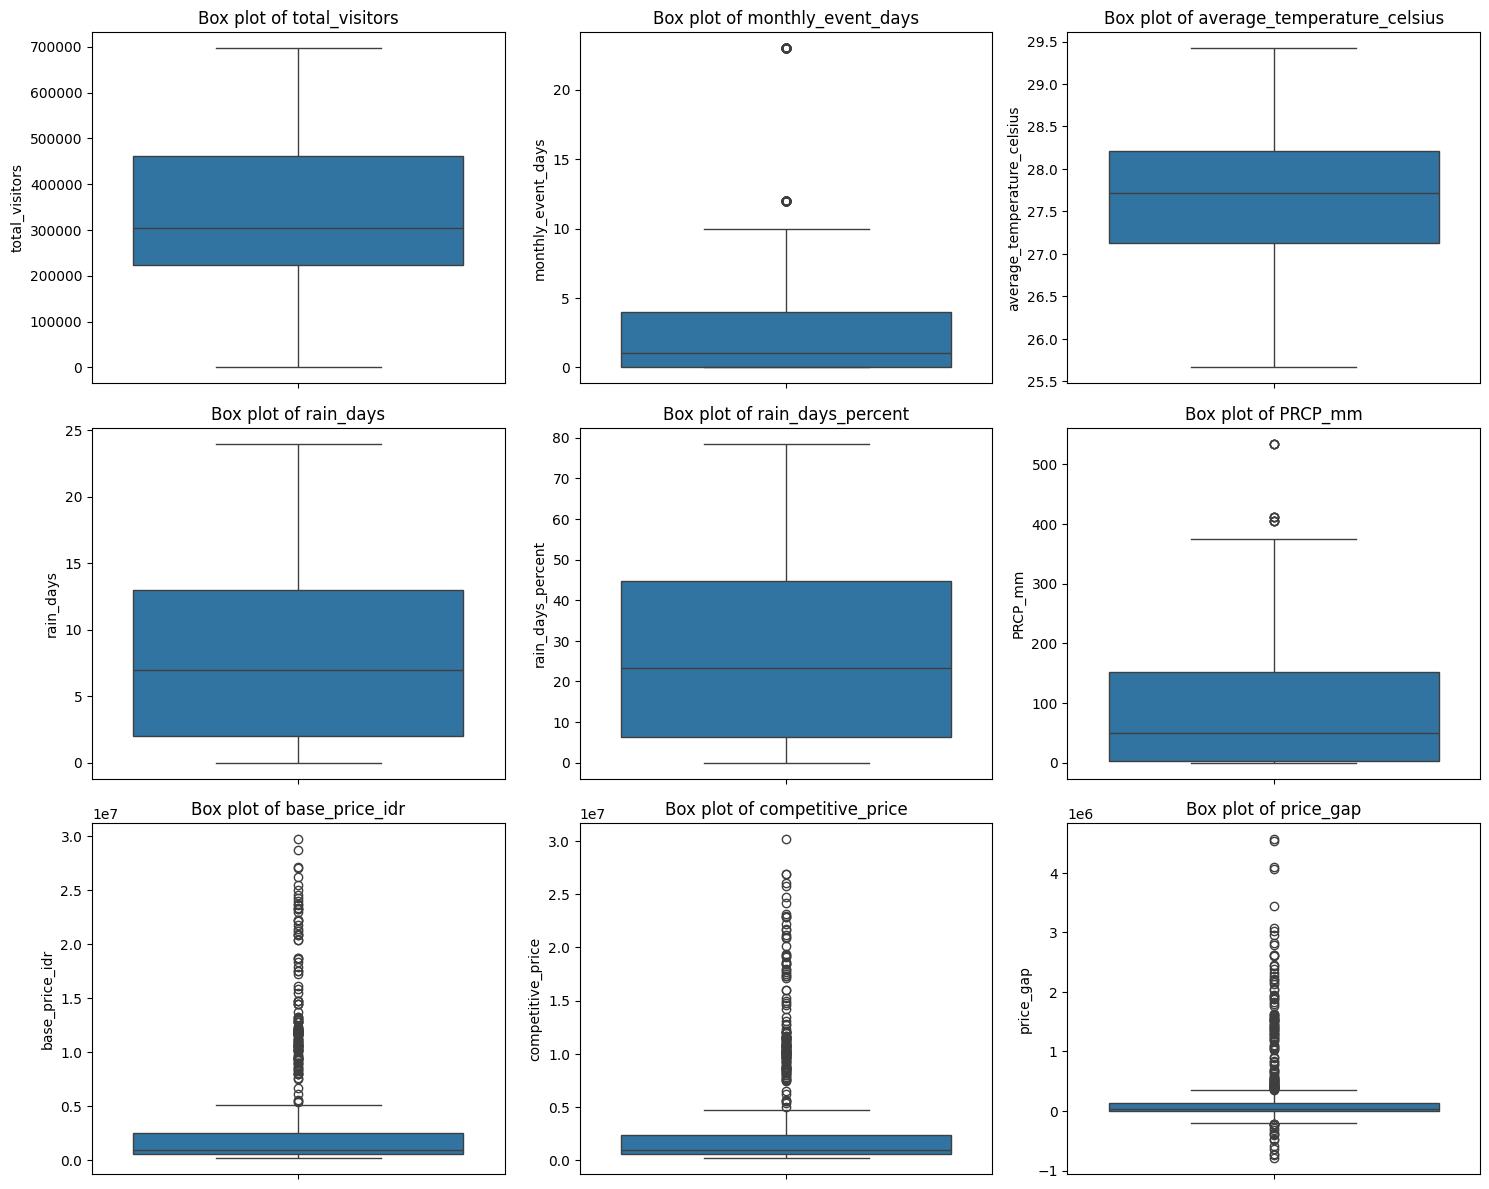

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure final_data_with_prices is available
if 'final_data_with_prices' not in locals() or final_data_with_prices is None or final_data_with_prices.empty:
    print("Error: final_data_with_prices DataFrame is not available or is empty. Cannot proceed.")
    raise NameError("final_data_with_prices is not available")

print("Visualizing outliers using Box Plots:")

# Select numerical columns for outlier visualization (excluding date and categorical)
numerical_cols = final_data_with_prices.select_dtypes(include=np.number).columns.tolist()

# Remove columns that are identifiers or clearly not expected to have outliers in the same way
# Adjust this list based on your understanding of the data.
cols_to_exclude = ['year', 'month', 'days_observed', 'days_in_month', 'competitor_count'] # Exclude columns that might not be relevant for standard outlier detection or are counts/identifiers

# Also exclude columns that might have been dropped or not created depending on previous steps
# Let's check existing columns first
available_numerical_cols = [col for col in numerical_cols if col in final_data_with_prices.columns]

# Filter out the columns to exclude
numerical_cols_for_outliers = [col for col in available_numerical_cols if col not in cols_to_exclude]

# Check if there are columns left to plot
if not numerical_cols_for_outliers:
    print("No suitable numerical columns found for outlier visualization after exclusion.")
else:
    # Determine grid size for subplots
    n_cols = 3
    n_rows = (len(numerical_cols_for_outliers) + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size based on grid
    for i, col in enumerate(numerical_cols_for_outliers):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=final_data_with_prices[col])
        plt.title(f'Box plot of {col}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

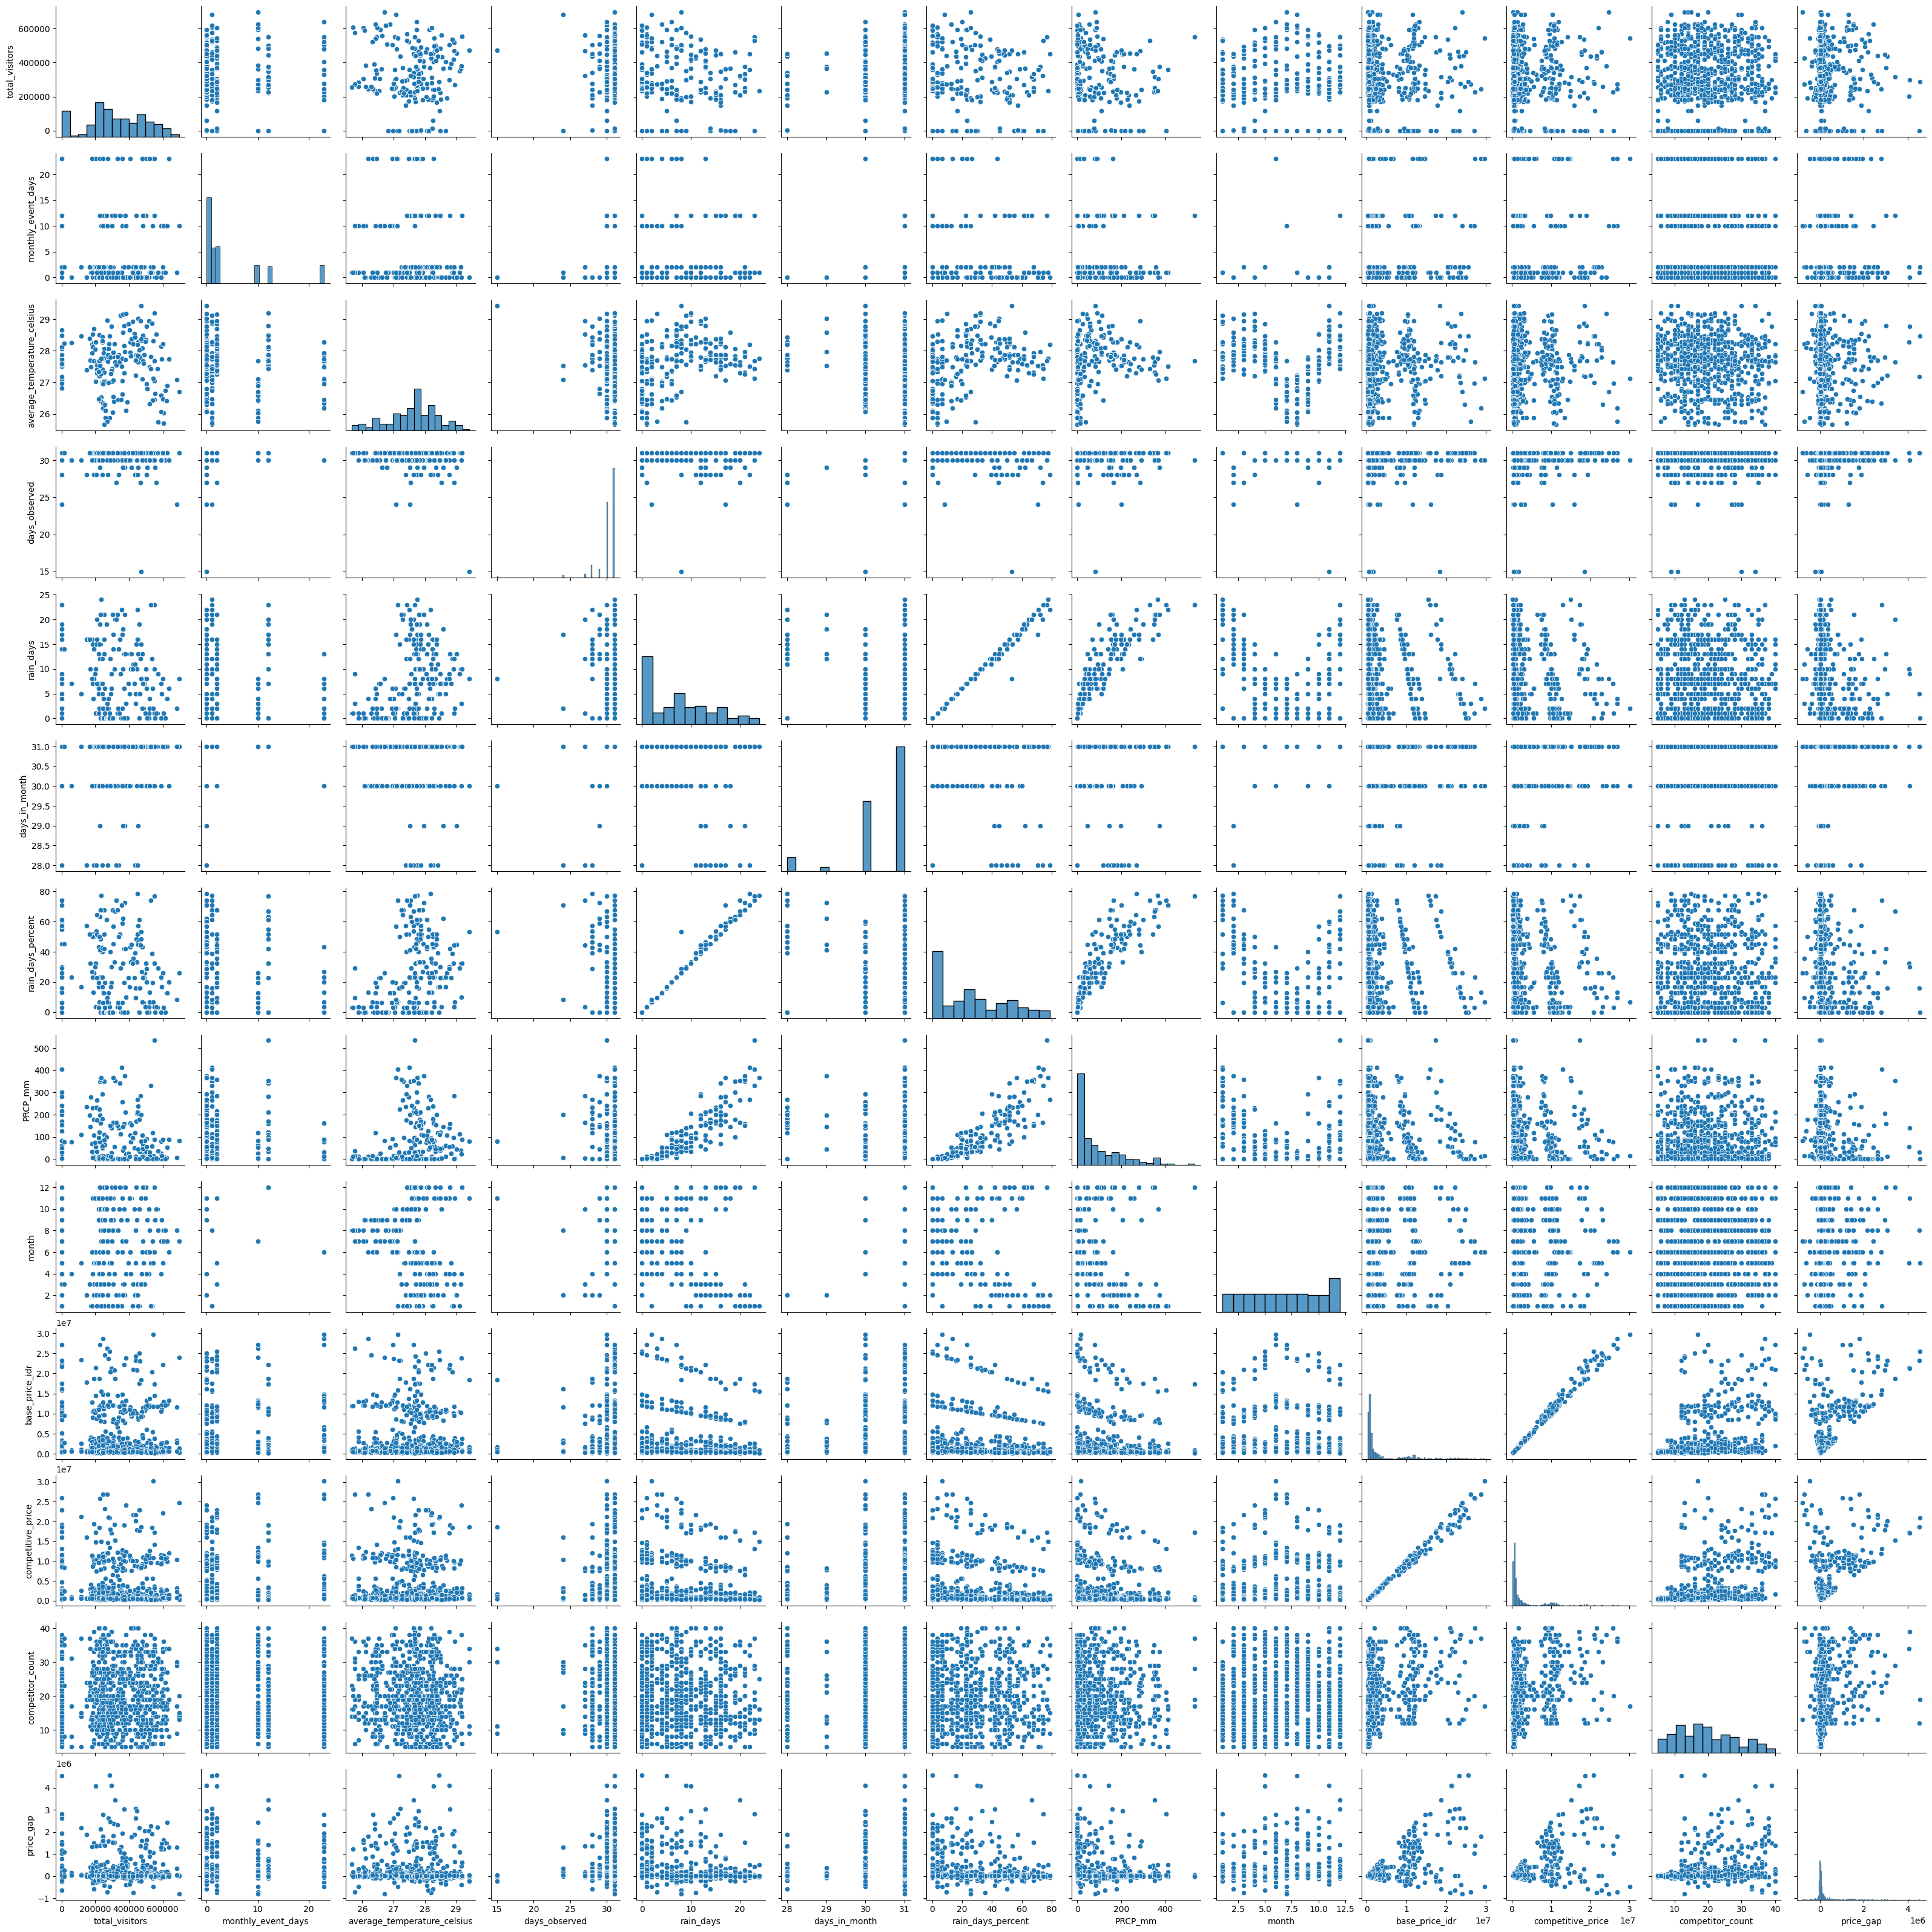

In [18]:
sns.pairplot(final_data_with_prices)

### normalized and standardized

In [ ]:
import pandas as pd

# Ensure final_data_with_prices is available
if 'final_data_with_prices' not in locals() or final_data_with_prices is None or final_data_with_prices.empty:
    print("Error: final_data_with_prices DataFrame is not available or is empty. Cannot proceed with encoding.")
    raise NameError("final_data_with_prices is not available")


print("Applying one-hot encoding to columns: ['season_annual_median', 'category_norm'] with custom naming and binary representation.")

# Apply one-hot encoding with custom naming and binary representation
final_data_encoded = pd.get_dummies(
    final_data_with_prices,
    columns=['season_annual_median', 'category_norm'],
    prefix=['is', 'is'],  # Use 'is' prefix for both
    dtype=int # Use integer type for the dummy variables
)

# Display the head and info of the encoded dataframe
print("\nDataFrame after One-Hot Encoding with custom naming and binary representation:")
display(final_data_encoded.head())
print("\nInfo for Encoded DataFrame:")
final_data_encoded.info()

Applying one-hot encoding to columns: ['season_annual_median', 'category_norm'] with custom naming and binary representation.

DataFrame after One-Hot Encoding with custom naming and binary representation:


total_visitors       date  monthly_event_days  average_temperature_celsius  \
0          174541 2009-01-01                 1.0                    27.492832   
1          174541 2009-01-01                 1.0                    27.492832   
2          174541 2009-01-01                 1.0                    27.492832   
3          174541 2009-01-01                 1.0                    27.492832   
4          147704 2009-02-01                 0.0                    27.384921   

   days_observed  rain_days  days_in_month  rain_days_percent  PRCP_mm  month  \
0             31         16             31          51.612903  280.416      1   
1             31         16             31          51.612903  280.416      1   
2             31         16             31          51.612903  280.416      1   
3             31         16             31          51.612903  280.416      1   
4             28         16             28          57.142857  235.204      2   

   base_price_idr  competitive_price  competitor_count  price_gap  \
0         4129695            4011512                23     118183   
1         2068969            1865854                22     203115   
2         1498710            1306501                13     192209   
3          378799             394060                11     -15261   
4          663929             650644                17      13285   

   is_High Season  is_Low Season  is_entertainment  is_experience  \
0               0              1                 0              0   
1               0              1                 0              1   
2               0              1                 1              0   
3               0              1                 0              0   
4               0              1                 0              0   

   is_in_room_service  is_rental  
0                   0          1  
1                   0          0  
2                   0          0  
3                   1          0  
4                   0          1


Info for Encoded DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    int64         
 1   date                         800 non-null    datetime64[ns]
 2   monthly_event_days           800 non-null    float64       
 3   average_temperature_celsius  800 non-null    float64       
 4   days_observed                800 non-null    int64         
 5   rain_days                    800 non-null    int64         
 6   days_in_month                800 non-null    int32         
 7   rain_days_percent            800 non-null    float64       
 8   PRCP_mm                      800 non-null    float64       
 9   month                        800 non-null    int64         
 10  base_price_idr               800 non-null    int64         
 11  competitive_pric

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Ensure final_data_encoded is available
if 'final_data_encoded' not in locals() or final_data_encoded is None or final_data_encoded.empty:
    print("Error: final_data_encoded DataFrame is not available or is empty. Cannot proceed with normalization.")
    raise NameError("final_data_encoded is not available")

# Columns to normalize
columns_to_normalize = [
    "total_visitors",
    "monthly_event_days",
    "average_temperature_celsius",
    "rain_days",
    "rain_days_percent",
    "PRCP_mm",
    "base_price_idr",
    "competitive_price",
    "competitor_count",
    "price_gap"
]

# Check if the columns exist in the DataFrame
missing_cols = [col for col in columns_to_normalize if col not in final_data_encoded.columns]
if missing_cols:
    print(f"Error: Columns not found in final_data_encoded: {missing_cols}")
    print("Available columns:", final_data_encoded.columns.tolist())
else:
    print(f"Applying Min-Max Normalization to columns: {columns_to_normalize}")

    # Initialize MinMaxScaler
    min_max_scaler = MinMaxScaler()

    # Apply Min-Max Normalization
    final_data_normalized = final_data_encoded.copy()
    final_data_normalized[columns_to_normalize] = min_max_scaler.fit_transform(final_data_normalized[columns_to_normalize])

    print("\nDataFrame after Min-Max Normalization:")
    display(final_data_normalized.head())
    print("\nInfo for Normalized DataFrame:")
    final_data_normalized.info()

Applying Min-Max Normalization to columns: ['total_visitors', 'monthly_event_days', 'average_temperature_celsius', 'rain_days', 'rain_days_percent', 'PRCP_mm', 'base_price_idr', 'competitive_price', 'competitor_count', 'price_gap']

DataFrame after Min-Max Normalization:


total_visitors       date  monthly_event_days  average_temperature_celsius  \
0        0.250379 2009-01-01            0.043478                     0.486502   
1        0.250379 2009-01-01            0.043478                     0.486502   
2        0.250379 2009-01-01            0.043478                     0.486502   
3        0.250379 2009-01-01            0.043478                     0.486502   
4        0.211881 2009-02-01            0.000000                     0.457782   

   days_observed  rain_days  days_in_month  rain_days_percent   PRCP_mm  \
0             31   0.666667             31           0.656891  0.524715   
1             31   0.666667             31           0.656891  0.524715   
2             31   0.666667             31           0.656891  0.524715   
3             31   0.666667             31           0.656891  0.524715   
4             28   0.666667             28           0.727273  0.440114   

   month  base_price_idr  competitive_price  competitor_count  price_gap  \
0      1        0.132754           0.127323          0.514286   0.169862   
1      1        0.062946           0.055825          0.485714   0.185696   
2      1        0.043629           0.037185          0.228571   0.183663   
3      1        0.005692           0.006781          0.171429   0.144984   
4      2        0.015350           0.015331          0.342857   0.150306   

   is_High Season  is_Low Season  is_entertainment  is_experience  \
0               0              1                 0              0   
1               0              1                 0              1   
2               0              1                 1              0   
3               0              1                 0              0   
4               0              1                 0              0   

   is_in_room_service  is_rental  
0                   0          1  
1                   0          0  
2                   0          0  
3                   1          0  
4                   0          1


Info for Normalized DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    float64       
 1   date                         800 non-null    datetime64[ns]
 2   monthly_event_days           800 non-null    float64       
 3   average_temperature_celsius  800 non-null    float64       
 4   days_observed                800 non-null    int64         
 5   rain_days                    800 non-null    float64       
 6   days_in_month                800 non-null    int32         
 7   rain_days_percent            800 non-null    float64       
 8   PRCP_mm                      800 non-null    float64       
 9   month                        800 non-null    int64         
 10  base_price_idr               800 non-null    float64       
 11  competitive_p

In [ ]:
# Save the normalized data to a CSV file
final_data_normalized.to_csv('final_data_normalized.csv', index=False)

print("DataFrame saved to 'final_data_normalized.csv'. You can download it from the file explorer.")

DataFrame saved to 'final_data_normalized.csv'. You can download it from the file explorer.


Feature Engineer

In [ ]:
import numpy as np

# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with feature engineering.")
    raise NameError("final_data_normalized is not available")

print("Applying feature engineering for Time & Seasonality...")

# Create sine and cosine transformations for the 'month' column
# Ensure 'month' column exists and is numeric
if 'month' not in final_data_normalized.columns or not pd.api.types.is_numeric_dtype(final_data_normalized['month']):
    print("Error: 'month' column not found or is not numeric.")
else:
    final_data_normalized['month_sin'] = np.sin(2 * np.pi * final_data_normalized['month'] / 12)
    final_data_normalized['month_cos'] = np.cos(2 * np.pi * final_data_normalized['month'] / 12)
    print("Created 'month_sin' and 'month_cos' features.")

# Drop one of the highly correlated season columns (is_High Season or is_Low Season)
# Assuming 'is_Low Season' is the one to drop to keep 'is_High Season' as the flag
columns_to_drop_season = ['is_Low Season']
existing_season_cols_to_drop = [col for col in columns_to_drop_season if col in final_data_normalized.columns]

if not existing_season_cols_to_drop:
    print(f"Columns {columns_to_drop_season} not found in the DataFrame. No season columns were dropped.")
    print("Available columns:", final_data_normalized.columns.tolist())
else:
    final_data_normalized = final_data_normalized.drop(columns=existing_season_cols_to_drop)
    print(f"Dropped columns: {existing_season_cols_to_drop}")


# Display the head and info of the updated DataFrame
print("\nDataFrame after Time & Seasonality Feature Engineering:")
display(final_data_normalized.head())
print("\nInfo for the updated DataFrame:")
final_data_normalized.info()

Applying feature engineering for Time & Seasonality...
Created 'month_sin' and 'month_cos' features.
Dropped columns: ['is_Low Season']

DataFrame after Time & Seasonality Feature Engineering:


total_visitors       date  monthly_event_days  average_temperature_celsius  \
0        0.250379 2009-01-01            0.043478                     0.486502   
1        0.250379 2009-01-01            0.043478                     0.486502   
2        0.250379 2009-01-01            0.043478                     0.486502   
3        0.250379 2009-01-01            0.043478                     0.486502   
4        0.211881 2009-02-01            0.000000                     0.457782   

   days_observed  rain_days  days_in_month  rain_days_percent   PRCP_mm  \
0             31   0.666667             31           0.656891  0.524715   
1             31   0.666667             31           0.656891  0.524715   
2             31   0.666667             31           0.656891  0.524715   
3             31   0.666667             31           0.656891  0.524715   
4             28   0.666667             28           0.727273  0.440114   

   month  ...  competitive_price  competitor_count  price_gap  is_High Season  \
0      1  ...           0.127323          0.514286   0.169862               0   
1      1  ...           0.055825          0.485714   0.185696               0   
2      1  ...           0.037185          0.228571   0.183663               0   
3      1  ...           0.006781          0.171429   0.144984               0   
4      2  ...           0.015331          0.342857   0.150306               0   

   is_entertainment  is_experience  is_in_room_service  is_rental  month_sin  \
0                 0              0                   0          1   0.500000   
1                 0              1                   0          0   0.500000   
2                 1              0                   0          0   0.500000   
3                 0              0                   1          0   0.500000   
4                 0              0                   0          1   0.866025   

   month_cos  
0   0.866025  
1   0.866025  
2   0.866025  
3   0.866025  
4   0.500000  

[5 rows x 21 columns]


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    float64       
 1   date                         800 non-null    datetime64[ns]
 2   monthly_event_days           800 non-null    float64       
 3   average_temperature_celsius  800 non-null    float64       
 4   days_observed                800 non-null    int64         
 5   rain_days                    800 non-null    float64       
 6   days_in_month                800 non-null    int32         
 7   rain_days_percent            800 non-null    float64       
 8   PRCP_mm                      800 non-null    float64       
 9   month                        800 non-null    int64         
 10  base_price_idr               800 non-null    float64       
 11  competitive_

In [ ]:
# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with feature engineering.")
    raise NameError("final_data_normalized is not available")

print("Applying feature engineering for Event Interactions...")

# Calculate event_rate: monthly_event_days / days_in_month
if 'monthly_event_days' in final_data_normalized.columns and 'days_in_month' in final_data_normalized.columns:
    # Add a small epsilon to avoid division by zero, though days_in_month should never be zero
    epsilon = 1e-9
    final_data_normalized['event_rate'] = final_data_normalized['monthly_event_days'] / (final_data_normalized['days_in_month'] + epsilon)
    print("Created 'event_rate' feature.")
else:
    print("Warning: 'monthly_event_days' or 'days_in_month' column not found. Skipping 'event_rate' creation.")

# Calculate event_high_interact: event_rate * is_High Season
# Check if both 'event_rate' and 'is_High Season' columns exist
if 'event_rate' in final_data_normalized.columns and 'is_High Season' in final_data_normalized.columns:
    final_data_normalized['event_high_interact'] = final_data_normalized['event_rate'] * final_data_normalized['is_High Season']
    print("Created 'event_high_interact' feature.")
elif 'event_rate' not in final_data_normalized.columns:
     print("Warning: 'event_rate' column not found. Skipping 'event_high_interact' creation.")
elif 'is_High Season' not in final_data_normalized.columns:
    print("Warning: 'is_High Season' column not found. Skipping 'event_high_interact' creation.")


# Display the head and info of the updated DataFrame
print("\nDataFrame after Event Interactions Feature Engineering:")
display(final_data_normalized.head())
print("\nInfo for the updated DataFrame:")
final_data_normalized.info()

Applying feature engineering for Event Interactions...
Created 'event_rate' feature.
Created 'event_high_interact' feature.

DataFrame after Event Interactions Feature Engineering:


total_visitors       date  monthly_event_days  average_temperature_celsius  \
0        0.250379 2009-01-01            0.043478                     0.486502   
1        0.250379 2009-01-01            0.043478                     0.486502   
2        0.250379 2009-01-01            0.043478                     0.486502   
3        0.250379 2009-01-01            0.043478                     0.486502   
4        0.211881 2009-02-01            0.000000                     0.457782   

   days_observed  rain_days  days_in_month  rain_days_percent   PRCP_mm  \
0             31   0.666667             31           0.656891  0.524715   
1             31   0.666667             31           0.656891  0.524715   
2             31   0.666667             31           0.656891  0.524715   
3             31   0.666667             31           0.656891  0.524715   
4             28   0.666667             28           0.727273  0.440114   

   month  ...  price_gap  is_High Season  is_entertainment  is_experience  \
0      1  ...   0.169862               0                 0              0   
1      1  ...   0.185696               0                 0              1   
2      1  ...   0.183663               0                 1              0   
3      1  ...   0.144984               0                 0              0   
4      2  ...   0.150306               0                 0              0   

   is_in_room_service  is_rental  month_sin  month_cos  event_rate  \
0                   0          1   0.500000   0.866025    0.001403   
1                   0          0   0.500000   0.866025    0.001403   
2                   0          0   0.500000   0.866025    0.001403   
3                   1          0   0.500000   0.866025    0.001403   
4                   0          1   0.866025   0.500000    0.000000   

   event_high_interact  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 23 columns]


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    float64       
 1   date                         800 non-null    datetime64[ns]
 2   monthly_event_days           800 non-null    float64       
 3   average_temperature_celsius  800 non-null    float64       
 4   days_observed                800 non-null    int64         
 5   rain_days                    800 non-null    float64       
 6   days_in_month                800 non-null    int32         
 7   rain_days_percent            800 non-null    float64       
 8   PRCP_mm                      800 non-null    float64       
 9   month                        800 non-null    int64         
 10  base_price_idr               800 non-null    float64       
 11  competitive_

In [ ]:
import numpy as np

# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with feature engineering.")
    raise NameError("final_data_normalized is not available")

print("Applying feature engineering for Price Interactions...")

# Calculate price_gap_pct: (base_price_idr - competitive_price) / (competitive_price + ε)
if 'base_price_idr' in final_data_normalized.columns and 'competitive_price' in final_data_normalized.columns:
    epsilon = 1e-9  # Small constant to avoid division by zero
    final_data_normalized['price_gap_pct'] = (final_data_normalized['base_price_idr'] - final_data_normalized['competitive_price']) / (final_data_normalized['competitive_price'] + epsilon)
    print("Created 'price_gap_pct' feature.")
else:
    print("Warning: 'base_price_idr' or 'competitive_price' column not found. Skipping 'price_gap_pct' creation.")

# Display the head and info of the updated DataFrame
print("\nDataFrame after Price Interactions Feature Engineering:")
display(final_data_normalized.head())
print("\nInfo for the updated DataFrame:")
final_data_normalized.info()

Applying feature engineering for Price Interactions...
Created 'price_gap_pct' feature.

DataFrame after Price Interactions Feature Engineering:


total_visitors       date  monthly_event_days  average_temperature_celsius  \
0        0.250379 2009-01-01            0.043478                     0.486502   
1        0.250379 2009-01-01            0.043478                     0.486502   
2        0.250379 2009-01-01            0.043478                     0.486502   
3        0.250379 2009-01-01            0.043478                     0.486502   
4        0.211881 2009-02-01            0.000000                     0.457782   

   days_observed  rain_days  days_in_month  rain_days_percent   PRCP_mm  \
0             31   0.666667             31           0.656891  0.524715   
1             31   0.666667             31           0.656891  0.524715   
2             31   0.666667             31           0.656891  0.524715   
3             31   0.666667             31           0.656891  0.524715   
4             28   0.666667             28           0.727273  0.440114   

   month  ...  is_High Season  is_entertainment  is_experience  \
0      1  ...               0                 0              0   
1      1  ...               0                 0              1   
2      1  ...               0                 1              0   
3      1  ...               0                 0              0   
4      2  ...               0                 0              0   

   is_in_room_service  is_rental  month_sin  month_cos  event_rate  \
0                   0          1   0.500000   0.866025    0.001403   
1                   0          0   0.500000   0.866025    0.001403   
2                   0          0   0.500000   0.866025    0.001403   
3                   1          0   0.500000   0.866025    0.001403   
4                   0          1   0.866025   0.500000    0.000000   

   event_high_interact  price_gap_pct  
0                  0.0       0.042651  
1                  0.0       0.127576  
2                  0.0       0.173275  
3                  0.0      -0.160596  
4                  0.0       0.001294  

[5 rows x 24 columns]


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    float64       
 1   date                         800 non-null    datetime64[ns]
 2   monthly_event_days           800 non-null    float64       
 3   average_temperature_celsius  800 non-null    float64       
 4   days_observed                800 non-null    int64         
 5   rain_days                    800 non-null    float64       
 6   days_in_month                800 non-null    int32         
 7   rain_days_percent            800 non-null    float64       
 8   PRCP_mm                      800 non-null    float64       
 9   month                        800 non-null    int64         
 10  base_price_idr               800 non-null    float64       
 11  competitive_

In [ ]:
import numpy as np

# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with feature engineering.")
    raise NameError("final_data_normalized is not available")

print("Applying feature engineering for Lagged and Rolling Features per Category...")

# Determine the category for each row
# Assuming the 'is_' columns represent the categories and are binary (0 or 1)
category_cols = ['is_entertainment', 'is_experience', 'is_in_room_service', 'is_rental']

# Check if category columns exist
if not all(col in final_data_normalized.columns for col in category_cols):
    print("Error: One or more category columns not found in the DataFrame.")
    print("Available columns:", final_data_normalized.columns.tolist())
else:
    # Find the category with the maximum value (which should be 1 for the active category)
    final_data_normalized['category'] = final_data_normalized[category_cols].idxmax(axis=1).str.replace('is_', '')
    print("Created 'category' column.")

    # Sort by category and date to ensure correct lagging and rolling calculations
    final_data_normalized = final_data_normalized.sort_values(by=['category', 'date'])

    # Apply feature engineering per category
    grouped = final_data_normalized.groupby('category')

    # Lagged features
    final_data_normalized['visitors_lag1'] = grouped['total_visitors'].shift(1)
    final_data_normalized['visitors_lag3'] = grouped['total_visitors'].shift(3)
    final_data_normalized['competitive_price_lag1'] = grouped['competitive_price'].shift(1)
    final_data_normalized['competitor_count_lag1'] = grouped['competitor_count'].shift(1)
    final_data_normalized['price_gap_lag1'] = grouped['price_gap'].shift(1) # Added this line
    print("Created lagged features.")

    # Rolling features (window size 3)
    final_data_normalized['visitors_roll3_mean'] = grouped['total_visitors'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
    final_data_normalized['visitors_roll3_std'] = grouped['total_visitors'].rolling(window=3, min_periods=1).std().reset_index(level=0, drop=True)
    final_data_normalized['price_gap_roll3_mean'] = grouped['price_gap'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
    print("Created rolling features.")

    # Momentum features
    epsilon = 1e-9  # Small constant to avoid division by zero
    final_data_normalized['visitors_mom'] = (final_data_normalized['total_visitors'] - final_data_normalized['visitors_lag1']) / (final_data_normalized['visitors_lag1'] + epsilon)
    final_data_normalized['price_gap_mom'] = final_data_normalized['price_gap'] - final_data_normalized['price_gap_lag1']
    print("Created momentum features.")


    # Display the head and info of the updated DataFrame
    print("\nDataFrame after Lagged and Rolling Feature Engineering per Category:")
    display(final_data_normalized.head())
    print("\nInfo for the updated DataFrame:")
    final_data_normalized.info()

Applying feature engineering for Lagged and Rolling Features per Category...
Created 'category' column.
Created lagged features.
Created rolling features.
Created momentum features.

DataFrame after Lagged and Rolling Feature Engineering per Category:


total_visitors       date  monthly_event_days  \
2         0.250379 2009-01-01            0.043478   
6         0.211881 2009-02-01            0.000000   
10        0.241290 2009-03-01            0.086957   
14        0.270799 2009-04-01            0.000000   
18        0.273707 2009-05-01            0.086957   

    average_temperature_celsius  days_observed  rain_days  days_in_month  \
2                      0.486502             31   0.666667             31   
6                      0.457782             28   0.666667             28   
10                     0.539922             31   0.416667             31   
14                     0.680133             30   0.166667             30   
18                     0.537203             30   0.291667             31   

    rain_days_percent   PRCP_mm  month  ...  visitors_lag1  visitors_lag3  \
2            0.656891  0.524715      1  ...            NaN            NaN   
6            0.727273  0.440114      2  ...       0.250379            NaN   
10           0.410557  0.271388      3  ...       0.211881            NaN   
14           0.169697  0.023764      4  ...       0.241290       0.250379   
18           0.296970  0.122624      5  ...       0.270799       0.211881   

    competitive_price_lag1  competitor_count_lag1  price_gap_lag1  \
2                      NaN                    NaN             NaN   
6                 0.037185               0.228571        0.183663   
10                0.525997               0.542857        0.499275   
14                0.094039               0.828571        0.224133   
18                0.099797               0.685714        0.250839   

    visitors_roll3_mean  visitors_roll3_std  price_gap_roll3_mean  \
2              0.250379                 NaN              0.183663   
6              0.231130            0.027222              0.341469   
10             0.234517            0.020123              0.302357   
14             0.241324            0.029459              0.324749   
18             0.261932            0.017935              0.300501   

    visitors_mom  price_gap_mom  
2            NaN            NaN  
6      -0.153758       0.315612  
10      0.138798      -0.275142  
14      0.122297       0.026706  
18      0.010738       0.175693  

[5 rows x 35 columns]


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 2 to 796
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    float64       
 1   date                         800 non-null    datetime64[ns]
 2   monthly_event_days           800 non-null    float64       
 3   average_temperature_celsius  800 non-null    float64       
 4   days_observed                800 non-null    int64         
 5   rain_days                    800 non-null    float64       
 6   days_in_month                800 non-null    int32         
 7   rain_days_percent            800 non-null    float64       
 8   PRCP_mm                      800 non-null    float64       
 9   month                        800 non-null    int64         
 10  base_price_idr               800 non-null    float64       
 11  competitive_price

Visualizing Lagged Competitive Price per Category:


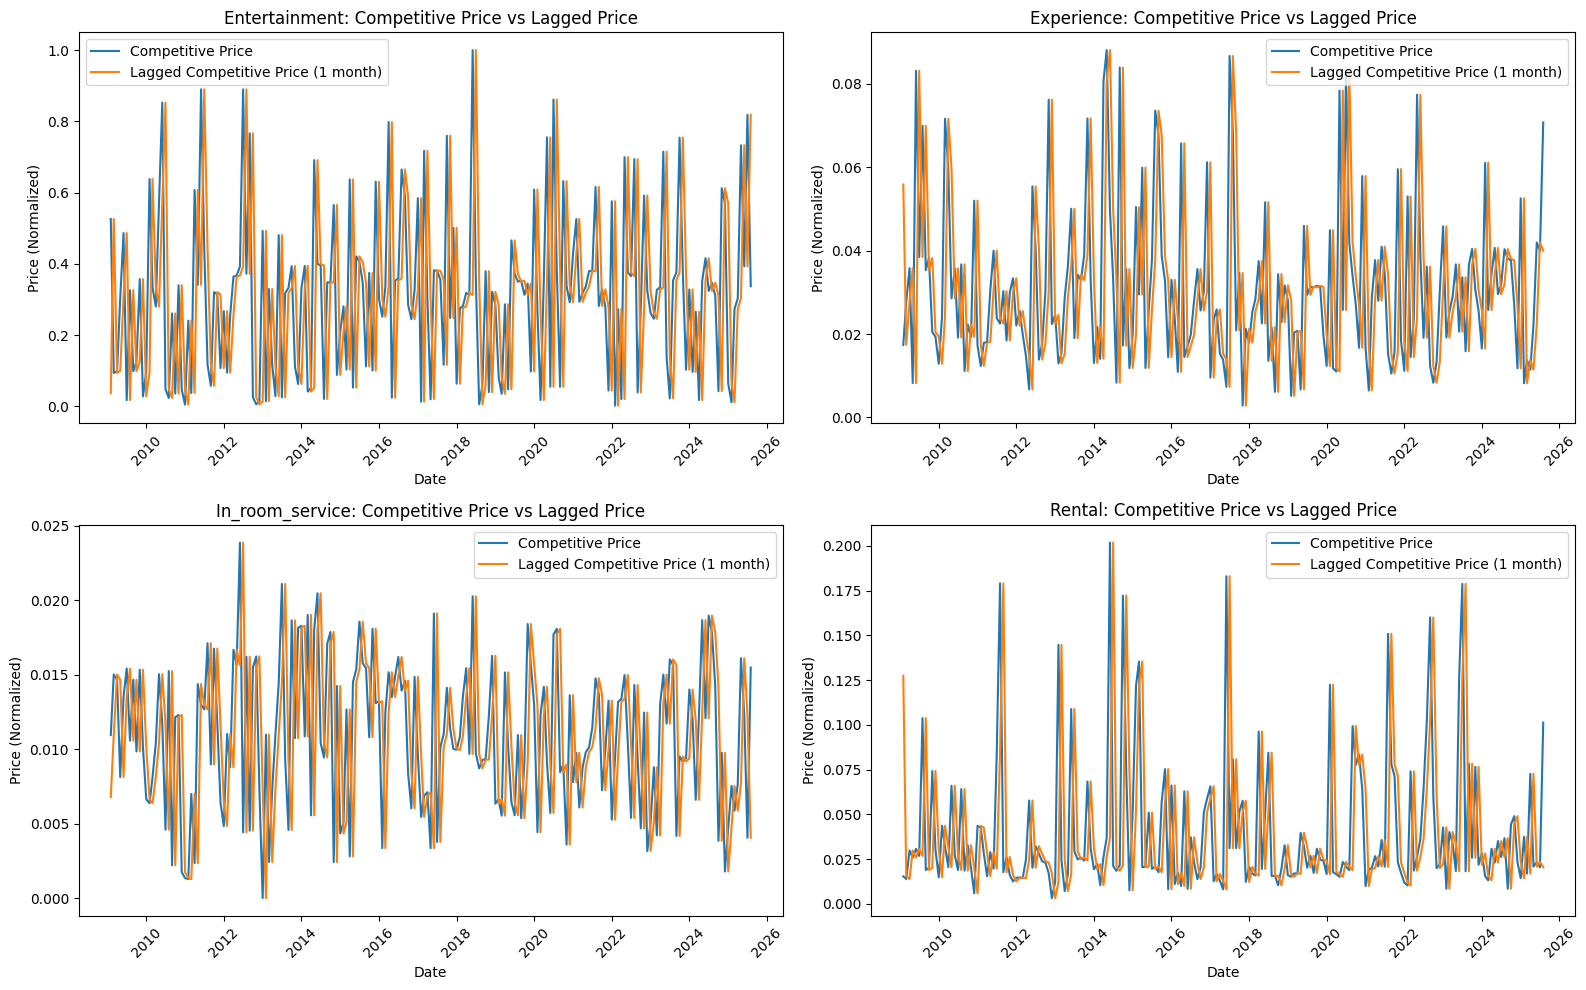

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with visualization.")
    raise NameError("final_data_normalized is not available")

# Ensure the 'category' and lagged price columns exist
required_cols = ['date', 'category', 'competitive_price', 'competitive_price_lag1']
if not all(col in final_data_normalized.columns for col in required_cols):
    print(f"Error: One or more required columns not found in the DataFrame: {required_cols}")
    print("Available columns:", final_data_normalized.columns.tolist())
else:
    print("Visualizing Lagged Competitive Price per Category:")

    # Get unique categories
    categories = final_data_normalized['category'].unique()

    # Determine grid size for subplots
    n_cols = 2
    n_rows = (len(categories) + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 8, n_rows * 5)) # Adjust figure size

    for i, category in enumerate(categories):
        plt.subplot(n_rows, n_cols, i + 1)
        category_df = final_data_normalized[final_data_normalized['category'] == category].dropna(subset=['competitive_price_lag1']) # Drop rows where lag is NaN
        sns.lineplot(data=category_df, x='date', y='competitive_price', label='Competitive Price')
        sns.lineplot(data=category_df, x='date', y='competitive_price_lag1', label='Lagged Competitive Price (1 month)')
        plt.title(f'{category.capitalize()}: Competitive Price vs Lagged Price')
        plt.xlabel('Date')
        plt.ylabel('Price (Normalized)')
        plt.legend()
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

### Feature Selection

Generating pairplot for selected features...
Using 'is_High Season' as hue for the pairplot.


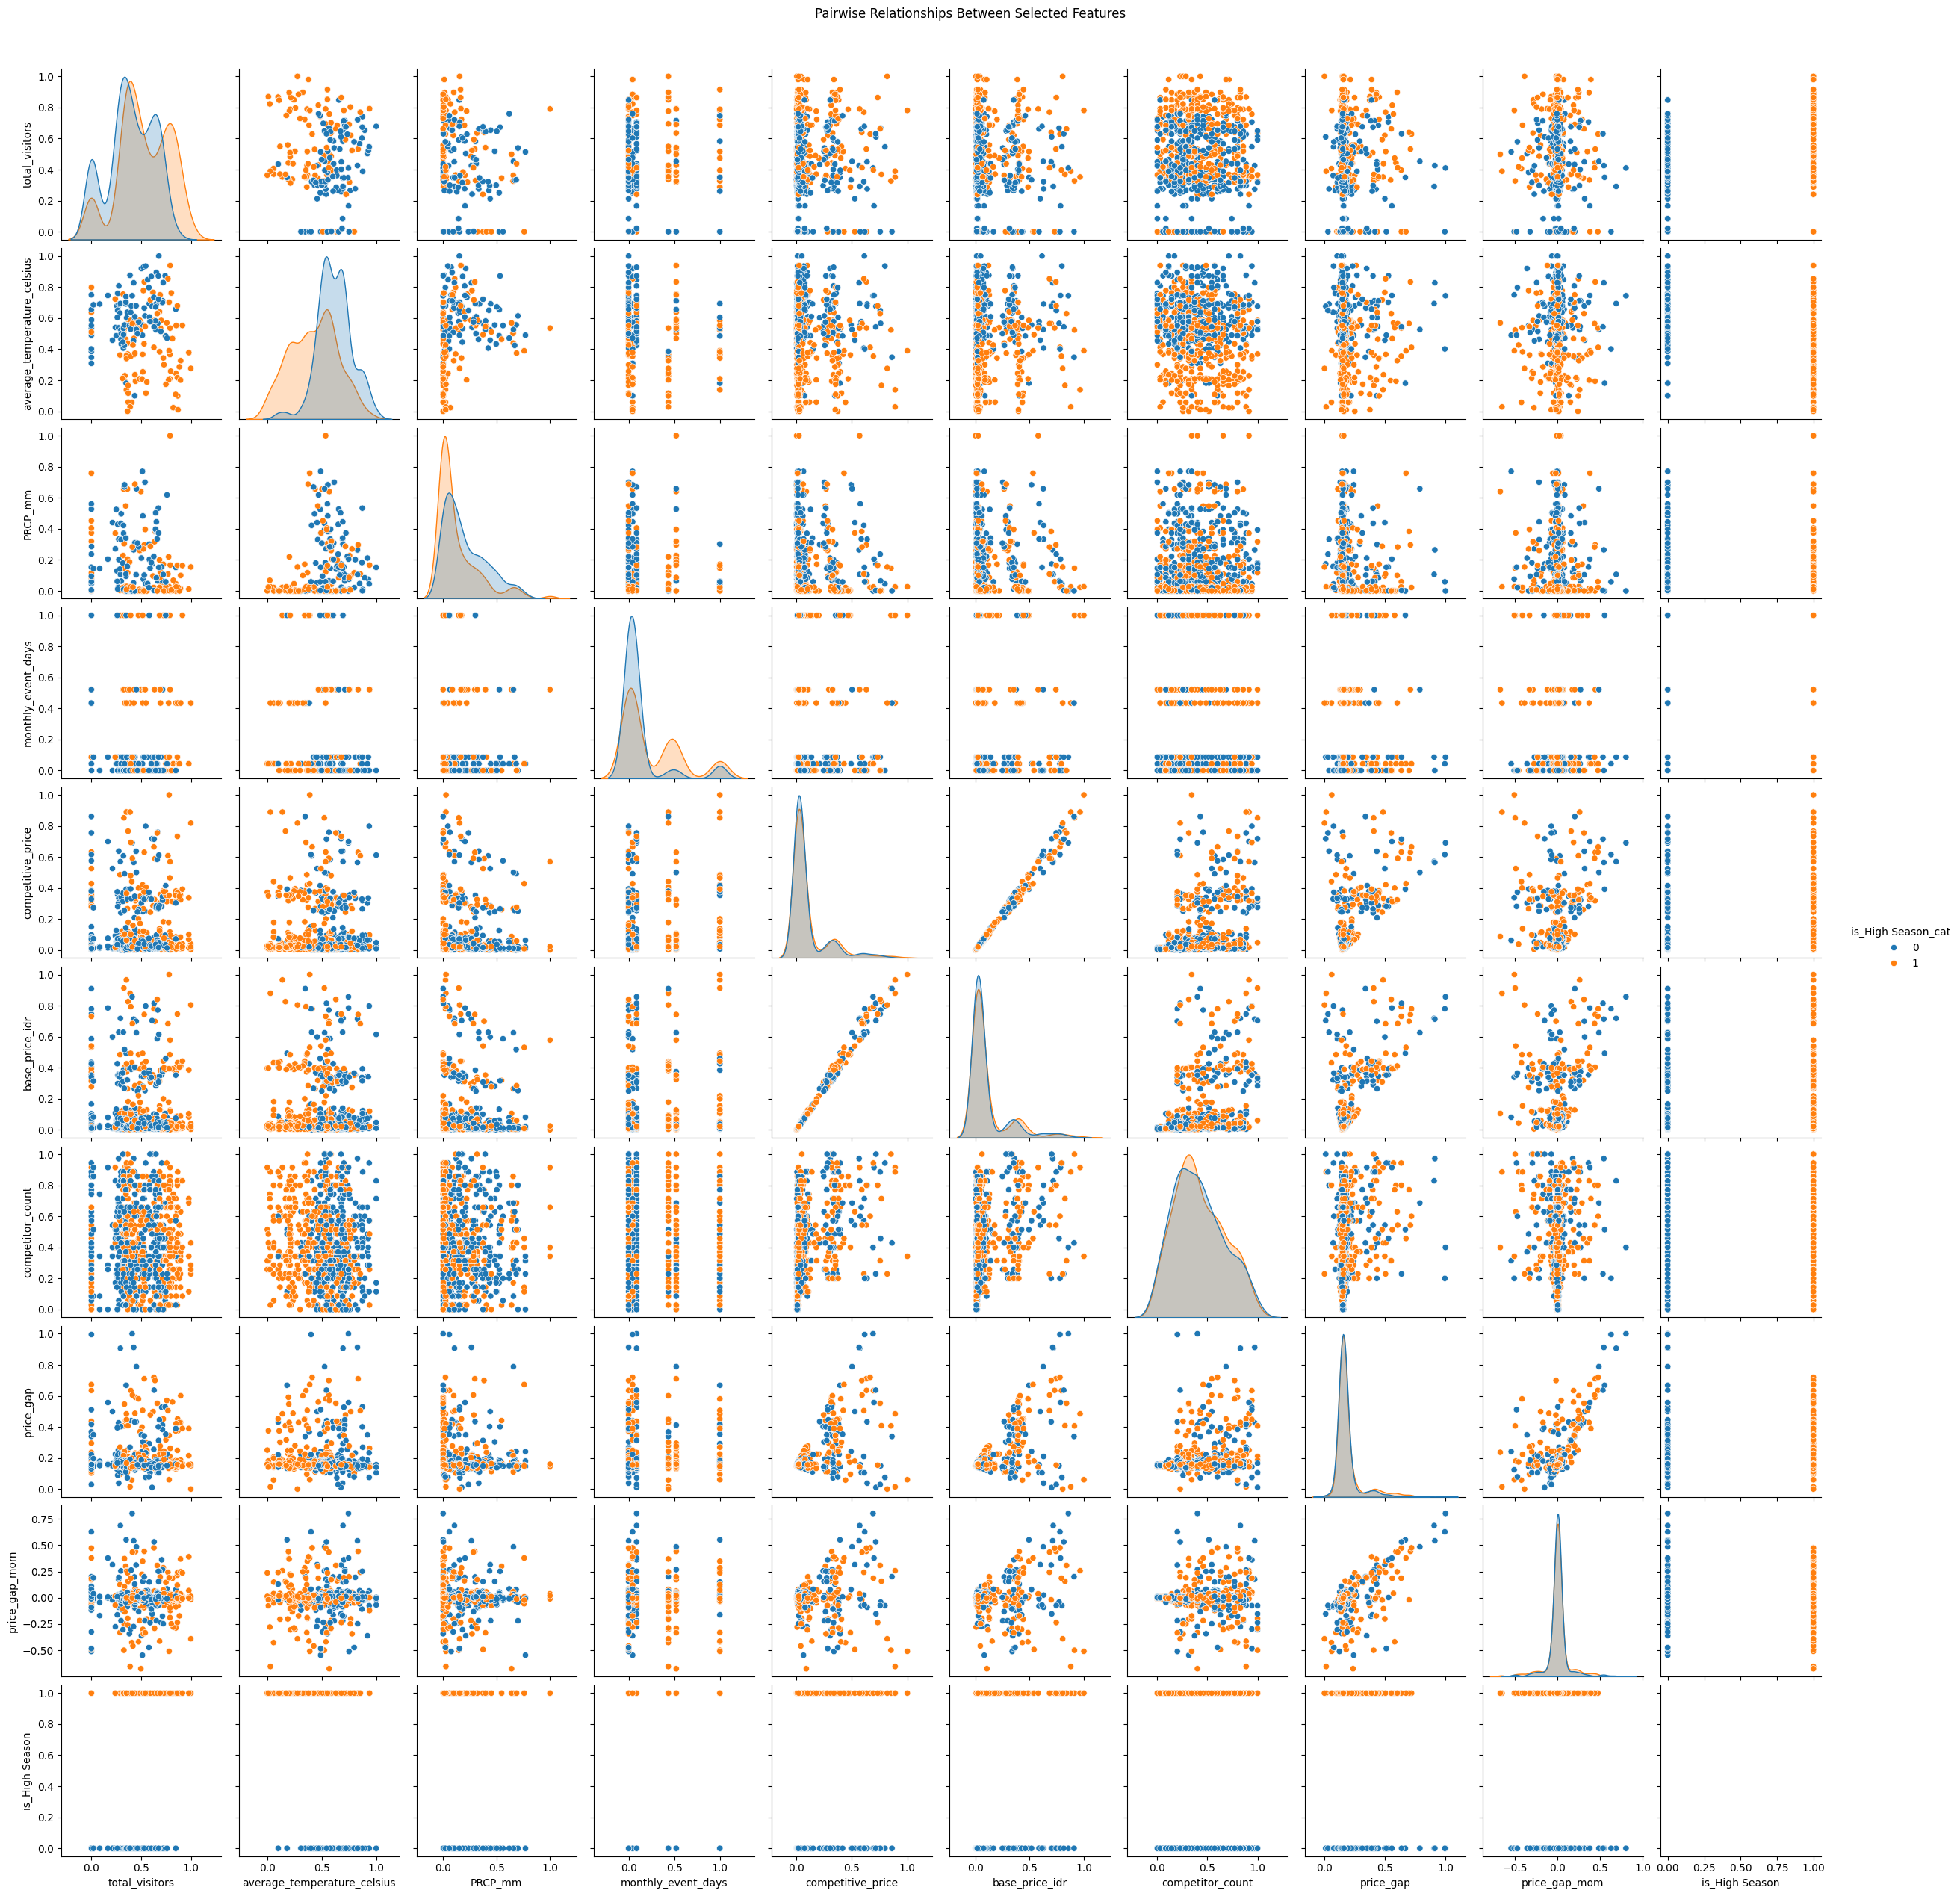

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with pairplot.")
    raise NameError("final_data_normalized is not available")

print("Generating pairplot for selected features...")

# Select a few relevant numerical columns for the pairplot
# Include the target variable 'total_visitors' and some engineered/original features
selected_features = [
    'total_visitors',
    'average_temperature_celsius',
    'PRCP_mm',
    'monthly_event_days',
    'competitive_price',
    'base_price_idr',
    'competitor_count',
    'price_gap',
    'visitors_lag1'
    'visitors_lag3',
    'price_gap_mom' # Example engineered feature
]

# Filter out columns that might not exist in the current state of final_data_normalized
existing_features = [col for col in selected_features if col in final_data_normalized.columns]

if not existing_features:
    print("No suitable features found for pairplot after selecting relevant columns.")
else:
    # Generate the pairplot
    # We won't use 'hue' with a continuous variable like total_visitors,
    # but you could add 'season_annual_median' as hue if you want to see
    # how relationships differ by season (ensure it's in existing_features and not dropped)

    # Check if 'is_High Season' exists to potentially use as hue (categorical)
    if 'is_High Season' in final_data_normalized.columns:
         print("Using 'is_High Season' as hue for the pairplot.")
         # Add 'is_High Season' to the list of features if it's not already there and relevant
         features_for_pairplot = [f for f in existing_features if f != 'is_High Season'] + ['is_High Season']
         # Ensure the hue column is treated categorically by seaborn if it's int/float
         final_data_normalized['is_High Season_cat'] = final_data_normalized['is_High Season'].astype(str)
         # Call pairplot with the temporary categorical column as hue
         sns.pairplot(data=final_data_normalized[features_for_pairplot + ['is_High Season_cat']], hue='is_High Season_cat')
         # Drop the temporary categorical column AFTER plotting
         final_data_normalized = final_data_normalized.drop(columns=['is_High Season_cat'])
    else:
        print("Generating pairplot without hue.")
        sns.pairplot(data=final_data_normalized[existing_features])


    plt.suptitle('Pairwise Relationships Between Selected Features', y=1.02) # Add a title
    plt.show()

In [ ]:
# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with dropping columns.")
    raise NameError("final_data_normalized is not available")

# Columns to drop based on user requirements
columns_to_drop_selection = [
    'total_visitors',
    'monthly_event_days',
    'rain_days',
    'rain_days_percent',
    'event_rate',
    'event_high_interact',
    'visitors_roll3_mean'
]

# Check if columns exist before dropping
existing_cols_to_drop = [col for col in columns_to_drop_selection if col in final_data_normalized.columns]

if not existing_cols_to_drop:
    print(f"Columns {columns_to_drop_selection} not found in the DataFrame. No columns were dropped.")
    print("Available columns:", final_data_normalized.columns.tolist())
else:
    # Drop the specified columns
    final_data_normalized = final_data_normalized.drop(columns=existing_cols_to_drop)
    print(f"Dropped columns: {existing_cols_to_drop}")

    # Display the head and info of the updated DataFrame
    print("\nDataFrame after dropping selected features:")
    display(final_data_normalized.head())
    print("\nInfo for the updated DataFrame:")
    final_data_normalized.info()

Dropped columns: ['total_visitors', 'monthly_event_days', 'rain_days', 'rain_days_percent', 'event_rate', 'event_high_interact', 'visitors_roll3_mean']

DataFrame after dropping selected features:


date  average_temperature_celsius  days_observed  days_in_month  \
2  2009-01-01                     0.486502             31             31   
6  2009-02-01                     0.457782             28             28   
10 2009-03-01                     0.539922             31             31   
14 2009-04-01                     0.680133             30             30   
18 2009-05-01                     0.537203             30             31   

     PRCP_mm  month  base_price_idr  competitive_price  competitor_count  \
2   0.524715      1        0.043629           0.037185          0.228571   
6   0.440114      2        0.597894           0.525997          0.542857   
10  0.271388      3        0.108778           0.094039          0.828571   
14  0.023764      4        0.119485           0.099797          0.685714   
18  0.122624      5        0.359118           0.304118          0.971429   

    price_gap  ...       category  visitors_lag1  visitors_lag3  \
2    0.183663  ...  entertainment            NaN            NaN   
6    0.499275  ...  entertainment       0.250379            NaN   
10   0.224133  ...  entertainment       0.211881            NaN   
14   0.250839  ...  entertainment       0.241290       0.250379   
18   0.426532  ...  entertainment       0.270799       0.211881   

    competitive_price_lag1  competitor_count_lag1  price_gap_lag1  \
2                      NaN                    NaN             NaN   
6                 0.037185               0.228571        0.183663   
10                0.525997               0.542857        0.499275   
14                0.094039               0.828571        0.224133   
18                0.099797               0.685714        0.250839   

    visitors_roll3_std  price_gap_roll3_mean visitors_mom  price_gap_mom  
2                  NaN              0.183663          NaN            NaN  
6             0.027222              0.341469    -0.153758       0.315612  
10            0.020123              0.302357     0.138798      -0.275142  
14            0.029459              0.324749     0.122297       0.026706  
18            0.017935              0.300501     0.010738       0.175693  

[5 rows x 28 columns]


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 2 to 796
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         800 non-null    datetime64[ns]
 1   average_temperature_celsius  800 non-null    float64       
 2   days_observed                800 non-null    int64         
 3   days_in_month                800 non-null    int32         
 4   PRCP_mm                      800 non-null    float64       
 5   month                        800 non-null    int64         
 6   base_price_idr               800 non-null    float64       
 7   competitive_price            800 non-null    float64       
 8   competitor_count             800 non-null    float64       
 9   price_gap                    800 non-null    float64       
 10  is_High Season               800 non-null    int64         
 11  is_entertainment 

Calculating Price Elasticity of Demand...
Calculated 'visitors_pct_change' using 'visitors_lag1'.
Calculated 'price_pct_change' using 'base_price_idr'.
Calculated 'price_elasticity'.

DataFrame with Price Elasticity Calculation:


/tmp/ipython-input-48523185.py:15: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  final_data_normalized['visitors_pct_change'] = final_data_normalized.groupby('category')['visitors_lag1'].pct_change() * 100


date       category  visitors_lag1  base_price_idr  \
2  2009-01-01  entertainment            NaN        0.043629   
6  2009-02-01  entertainment       0.250379        0.597894   
10 2009-03-01  entertainment       0.211881        0.108778   
14 2009-04-01  entertainment       0.241290        0.119485   
18 2009-05-01  entertainment       0.270799        0.359118   

    visitors_pct_change  price_pct_change  price_elasticity  
2                   NaN               NaN               NaN  
6                   NaN       1270.410970               NaN  
10           -15.375757        -81.806419          0.187953  
14            13.879787          9.842720          1.410158  
18            12.229720        200.554544          0.060980


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 2 to 796
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         800 non-null    datetime64[ns]
 1   average_temperature_celsius  800 non-null    float64       
 2   days_observed                800 non-null    int64         
 3   days_in_month                800 non-null    int32         
 4   PRCP_mm                      800 non-null    float64       
 5   month                        800 non-null    int64         
 6   base_price_idr               800 non-null    float64       
 7   competitive_price            800 non-null    float64       
 8   competitor_count             800 non-null    float64       
 9   price_gap                    800 non-null    float64       
 10  is_High Season               800 non-null    int64         
 11  is_entertainment 

In [ ]:
import pandas as pd
import numpy as np

# Ensure final_data_normalized is available and sorted
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with y_uplift_next calculation.")
    raise NameError("final_data_normalized is not available")

# Ensure the data is sorted by category and date for correct lookahead calculation
final_data_normalized = final_data_normalized.sort_values(by=['category', 'date'])

# Calculate the percentage change in base_price_idr for the next period (lookahead)
# Group by category before calculating the percentage change to avoid looking across categories
if 'base_price_idr' in final_data_normalized.columns and 'category' in final_data_normalized.columns:
    # Use periods=-1 to look one period into the future
    final_data_normalized['y_uplift_next'] = final_data_normalized.groupby('category')['base_price_idr'].pct_change(periods=-1) * 100
    print("Created 'y_uplift_next' column, grouped by category.")
else:
    print("Error: Required columns ('base_price_idr' or 'category') not found for 'y_uplift_next' calculation.")
    print("Available columns:", final_data_normalized.columns.tolist())


# Display the head and info of the updated DataFrame
print("\nDataFrame with 'y_uplift_next' column:")
display(final_data_normalized[['date', 'category', 'base_price_idr', 'y_uplift_next']].head())
print("\nInfo for the updated DataFrame:")
final_data_normalized.info()

Created 'y_uplift_next' column, grouped by category.

DataFrame with 'y_uplift_next' column:


date       category  base_price_idr  y_uplift_next
2  2009-01-01  entertainment        0.043629     -92.702919
6  2009-02-01  entertainment        0.597894     449.644411
10 2009-03-01  entertainment        0.108778      -8.960740
14 2009-04-01  entertainment        0.119485     -66.728169
18 2009-05-01  entertainment        0.359118     -25.882284


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 2 to 796
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         800 non-null    datetime64[ns]
 1   average_temperature_celsius  800 non-null    float64       
 2   days_observed                800 non-null    int64         
 3   days_in_month                800 non-null    int32         
 4   PRCP_mm                      800 non-null    float64       
 5   month                        800 non-null    int64         
 6   base_price_idr               800 non-null    float64       
 7   competitive_price            800 non-null    float64       
 8   competitor_count             800 non-null    float64       
 9   price_gap                    800 non-null    float64       
 10  is_High Season               800 non-null    int64         
 11  is_entertainment 

Calculating Pearson and Spearman correlation between 'visitors_lag1' and 'y_uplift_next':
Pearson correlation coefficient: nan
Spearman correlation coefficient: 0.0040

At least one of the correlation coefficients is 0.2 or greater in absolute value.


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


### TRAIN TEST DATA